# Python for Mechanical Engineers

In [3]:
# source: https://github.com/vishwesh5/PythonForMechanicalEngineering

## Drag force

When a flow goes around a body, or a body goes through a fluid (gas or liquid), the fluid has to move to the sides to let the body to pass through. The energy lost on moving the fluid is translated to a force, called **drag force**


![Wikipedia](https://www.nasa.gov/sites/default/files/images/435224main_ACD10-0045-012_full.jpg)


In Mechanical Engineering, we prefer to work with dimensionless parameters, i.e. instead of a **drag force** in Newtons on a specific body of a specific size, e.g. a 3 m long car, we would like to know what is the drag force on a 1:250 model of this car and then translate the knowledge to a full size car. 

Therefore we define a dimensionless **Coefficient of Drag**:

$$ C_D = \frac{F_D}{0.5\rho V^2 A}$$

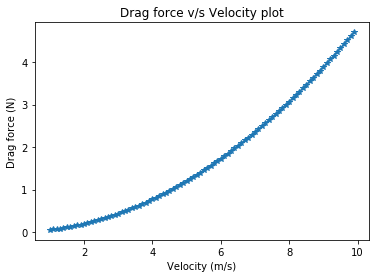

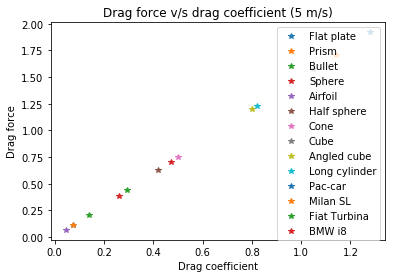

In [6]:
# Import module for plotting
import matplotlib.pyplot as plt

# Functions
def drag_force(c_d,A,rho,v):
    """
    Calculate drag force given c_d,A,rho,v:
        rho -> density of fluid
        A   -> Frontal area
        c_d -> Drag coefficient
        v   -> Velocity of bicycle
    """
    return 0.5*c_d*rho*A*v**2

def plotDragForceVelocity(dragForce,v):
    """
    Plots drag force v/s velocity
    """
    plt.plot(v,dragForce,'*-')
    plt.xlabel("Velocity (m/s)")
    plt.ylabel("Drag force (N)")
    plt.title("Drag force v/s Velocity plot")
    
    # Show the plot
    plt.show()

def plotDragForceCd():
    """
    Plots drag force v/s drag coefficient
    """
    # Frontal area (m^2)
    A = 0.1
    # Density (kg/m^3)
    rho = 1.2
    # Velocity (m/s)
    v = 5
    # Drag coefficient for different figures
    cd = {
          "Flat plate"   : 1.28,
          "Prism"        : 1.14,
          "Bullet"       : 0.295,
          "Sphere"       : 0.47,
          "Airfoil"      : 0.045,
          "Half sphere"  : 0.42,
          "Cone"         : 0.50,
          "Cube"         : 1.05,
          "Angled cube"  : 0.80,
          "Long cylinder": 0.82,
          "Pac-car"      : 0.075,
          "Milan SL"     : 0.076,
          "Fiat Turbina" : 0.14,
          "BMW i8"       : 0.26
          }
    dragForces = {}
    for i in cd.keys():
        dragForces[i] = drag_force(cd[i],A,rho,v)
    # Plot results
    for i in cd.keys():
        plt.plot(cd[i],dragForces[i],'*',label=i)
    plt.legend(loc='upper right')
    plt.xlabel("Drag coefficient")
    plt.ylabel("Drag force")
    plt.title("Drag force v/s drag coefficient (5 m/s)")
    plt.show()

def plotResultsForBicycle():
    """
    Plot drag force v/s velocity for bicycle
    """
    # Drag coefficient
    c_d = 0.8
    # Frontal area (m^2)
    A = 0.1
    # Density (kg/m^3)
    rho = 1.2
    # Bicycle velocity (m/s)
    # Velocity is varying from 1 to 10 m/s in steps of 0.1 m/s
    v = [i/10 for i in range(10,100,1)]
    # Drag force values
    dragForce = [drag_force(c_d,A,rho,velocity) for velocity in v]
    plotDragForceVelocity(dragForce,v)


    
plt.figure("Drag coefficient v/s velocity")
plotResultsForBicycle()
plt.figure("Drag coefficient v/s drag force")
plotDragForceCd()